In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv
Saving train_data.csv to train_data.csv


In [16]:
import io
import pandas as pd

#df_train = pd.read_csv(io.StringIO(uploaded['train_data.csv'].decode('utf-8'))).drop(['out_pressure'],axis=1)
#df_test = pd.read_csv(io.StringIO(uploaded['test_data.csv'].decode('utf-8'))).drop(['out_pressure'],axis=1)

df_train = pd.read_csv('train_data.csv', encoding='utf-8')
df_train_raw = df_train.copy()
df_test = pd.read_csv('test_data.csv', encoding='utf-8')
df_test_raw = df_test.copy()

In [17]:
# train 마력 변환
df_train['force'] = df_test_raw['type']
for i in range(len(df_train)):
  if df_train['type'][i] in [0,4,5,6,7]:
     df_train['force'][i] = 30
  elif df_train['type'][i] == 1:
     df_train['force'][i] = 20
  elif df_train['type'][i] == 2:
     df_train['force'][i] = 10
  elif df_train['type'][i] == 3:
     df_train['force'][i] = 50
df_train = df_train.drop(['type'],axis=1)

# test 마력 변환
df_test['force'] = df_test_raw['type']
for i in range(len(df_test)):
  if df_test['type'][i] in [0,4,5,6,7]:
     df_test['force'][i] = 30
  elif df_test['type'][i] == 1:
     df_test['force'][i] = 20
  elif df_test['type'][i] == 2:
     df_test['force'][i] = 10
  elif df_test['type'][i] == 3:
     df_test['force'][i] = 50
df_test = df_test.drop(['type'],axis=1)

C:\Users\LEE\AppData\Local\Temp\ipykernel_2032\803301303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['force'][i] = 30
C:\Users\LEE\AppData\Local\Temp\ipykernel_2032\803301303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['force'][i] = 20
C:\Users\LEE\AppData\Local\Temp\ipykernel_2032\803301303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['force'][i] = 10
C:\Users\LEE\AppData\Local\Temp\ip

In [18]:
df_train['type'] = df_train_raw['type']
df_test['type'] = df_test_raw['type']

In [19]:
df_train.corr(method='pearson')

air_inflow  air_end_temp  out_pressure  motor_current  \
air_inflow       1.000000      0.636467           NaN       0.994585   
air_end_temp     0.636467      1.000000           NaN       0.703042   
out_pressure          NaN           NaN           NaN            NaN   
motor_current    0.994585      0.703042           NaN       1.000000   
motor_rpm        0.549101      0.990302           NaN       0.619536   
motor_temp       0.659138      0.999506           NaN       0.723685   
motor_vibe       0.347755      0.273699           NaN       0.353014   
force            0.823294      0.165039           NaN       0.780123   
type             0.169851      0.034830           NaN       0.160190   

               motor_rpm  motor_temp  motor_vibe     force      type  
air_inflow      0.549101    0.659138    0.347755  0.823294  0.169851  
air_end_temp    0.990302    0.999506    0.273699  0.165039  0.034830  
out_pressure         NaN         NaN         NaN       NaN       NaN  
motor_current   0.619536    0.723685    0.353014  0.780123  0.160190  
motor_rpm       1.000000    0.986419    0.237544  0.044495 -0.015008  
motor_temp      0.986419    1.000000    0.282746  0.195220  0.040964  
motor_vibe      0.237544    0.282746    1.000000  0.267408 -0.023323  
force           0.044495    0.195220    0.267408  1.000000  0.240715  
type           -0.015008    0.040964   -0.023323  0.240715  1.000000

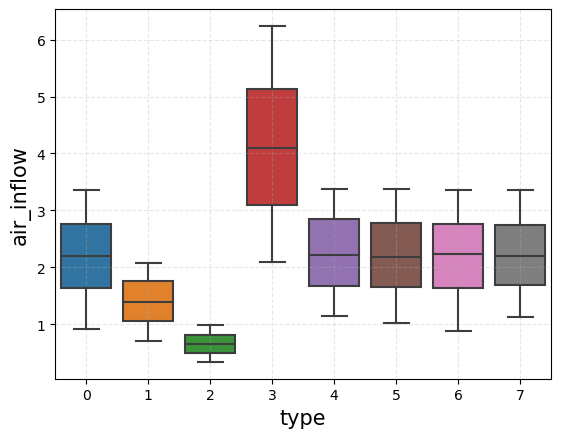

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = sns.boxplot(x='type', y='air_inflow', hue='type', data=df_test, dodge=False)
x.get_legend().remove()
plt.xlabel('type', size=15)
plt.ylabel('air_inflow',size=15)
plt.ylim()
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Text(0.5, 0, 'n_components')

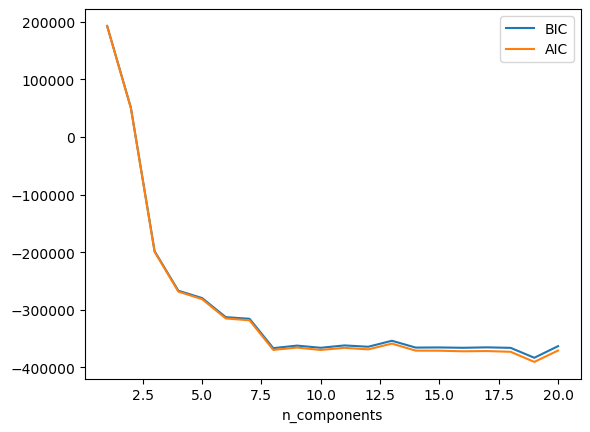

In [21]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_test) for n in n_components]
plt.plot(n_components, [m.bic(df_test) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_test) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [22]:
gm = GaussianMixture(n_components=19, n_init=10, random_state=0, covariance_type='full', init_params='kmeans')
gm.fit(df_train)
gm.weights_
gm.means_
gm.covariances_
gm.converged_
gm.n_iter_
gm.predict(df_test)
gm.predict_proba(df_test)

c:\Users\LEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wit

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
df_test

air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
0           2.51         53.28           0.7          32.54     2662.0   
1           2.66         55.24           0.7          34.45     2819.0   
2           1.72         42.74           0.7          22.23     1819.0   
3           2.20         49.15           0.7          28.50     2332.0   
4           2.06         47.28           0.7          26.67     2182.0   
...          ...           ...           ...            ...        ...   
7384        2.12         48.08           0.7          27.45     2246.0   
7385        1.48         39.63           0.7          19.19     1570.0   
7386        1.56         40.61           0.7          20.15     1649.0   
7387        1.59         40.99           0.7          20.52     1679.0   
7388        1.70         42.51           0.7          22.01     1801.0   

      motor_temp  motor_vibe  force  type  
0          69.58        3.48     30     0  
1          71.32        3.57     30     0  
2          60.21        3.01     30     0  
3          65.91        3.30     30     0  
4          64.24        3.21     30     0  
...          ...         ...    ...   ...  
7384       64.96        3.25     30     7  
7385       57.44        2.87     30     7  
7386       58.32        2.92     30     7  
7387       58.66        2.93     30     7  
7388       60.01        3.00     30     7  

[7389 rows x 9 columns]

Text(0.5, 0, 'densities')

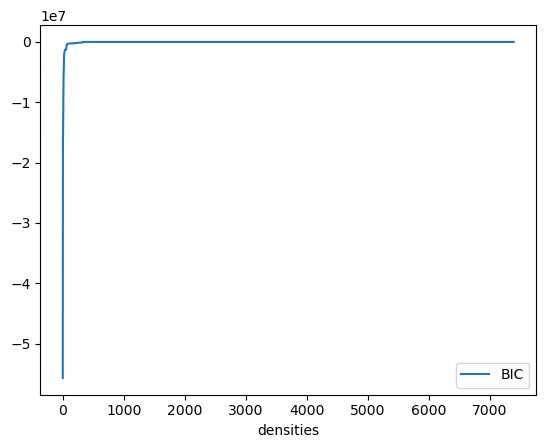

In [24]:
densities = gm.score_samples(df_test)
#df_test['cluster'] = gm.predict(df_test)
density_threshold = 0 #np.percentile(densities, 4.68)
anomalies = df_test[densities <= density_threshold]
normal = df_test[densities > density_threshold]

plt.plot(sorted(densities), label='BIC')
plt.legend(loc='best')
plt.xlabel('densities')

In [25]:
anomalies['label'] = '1'
normal['label'] = '0'

C:\Users\LEE\AppData\Local\Temp\ipykernel_2032\266635627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['label'] = '1'
C:\Users\LEE\AppData\Local\Temp\ipykernel_2032\266635627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['label'] = '0'


In [26]:
anomalies

air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
585         1.38         41.64           0.7          21.10     1651.0   
586         2.06         51.95           0.7          31.64     2476.0   
587         1.35         41.20           0.7          20.65     1616.0   
588         2.86         63.93           0.7          43.88     3434.0   
589         1.62         45.26           0.7          24.80     1941.0   
...          ...           ...           ...            ...        ...   
6800        1.44         50.90           0.7          27.05     2072.0   
7342        1.60         45.04           0.7          24.57     1923.0   
7348        2.76         62.36           0.7          42.28     3309.0   
7359        1.48         43.15           0.7          22.64     1772.0   
7360        1.74         47.05           0.7          26.63     2084.0   

      motor_temp  motor_vibe  force  type label  
585        58.34        3.12     30     0     1  
586        59.34        3.58     30     0     1  
587        60.34        3.10     30     0     1  
588        61.34        4.11     30     0     1  
589        62.34        3.28     30     0     1  
...          ...         ...    ...   ...   ...  
6800       63.02        3.55     30     6     1  
7342       61.37        3.27     30     7     1  
7348       76.77        4.04     30     7     1  
7359       59.69        3.18     30     7     1  
7360       63.16        3.36     30     7     1  

[344 rows x 10 columns]

In [27]:
df = pd.concat([normal,anomalies]).sort_index()
df

air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
0           2.51         53.28           0.7          32.54     2662.0   
1           2.66         55.24           0.7          34.45     2819.0   
2           1.72         42.74           0.7          22.23     1819.0   
3           2.20         49.15           0.7          28.50     2332.0   
4           2.06         47.28           0.7          26.67     2182.0   
...          ...           ...           ...            ...        ...   
7384        2.12         48.08           0.7          27.45     2246.0   
7385        1.48         39.63           0.7          19.19     1570.0   
7386        1.56         40.61           0.7          20.15     1649.0   
7387        1.59         40.99           0.7          20.52     1679.0   
7388        1.70         42.51           0.7          22.01     1801.0   

      motor_temp  motor_vibe  force  type label  
0          69.58        3.48     30     0     0  
1          71.32        3.57     30     0     0  
2          60.21        3.01     30     0     0  
3          65.91        3.30     30     0     0  
4          64.24        3.21     30     0     0  
...          ...         ...    ...   ...   ...  
7384       64.96        3.25     30     7     0  
7385       57.44        2.87     30     7     0  
7386       58.32        2.92     30     7     0  
7387       58.66        2.93     30     7     0  
7388       60.01        3.00     30     7     0  

[7389 rows x 10 columns]

In [28]:
df_test_raw['type'].value_counts()

0    1296
1    1107
2    1098
3     918
4     918
5     747
6     747
7     558
Name: type, dtype: int64

In [29]:
df['type'] = df_test_raw['type']
df['type'][df['label']=='1'].value_counts().sort_index()

0    143
2     27
3     26
4     13
5     30
6    101
7      4
Name: type, dtype: int64

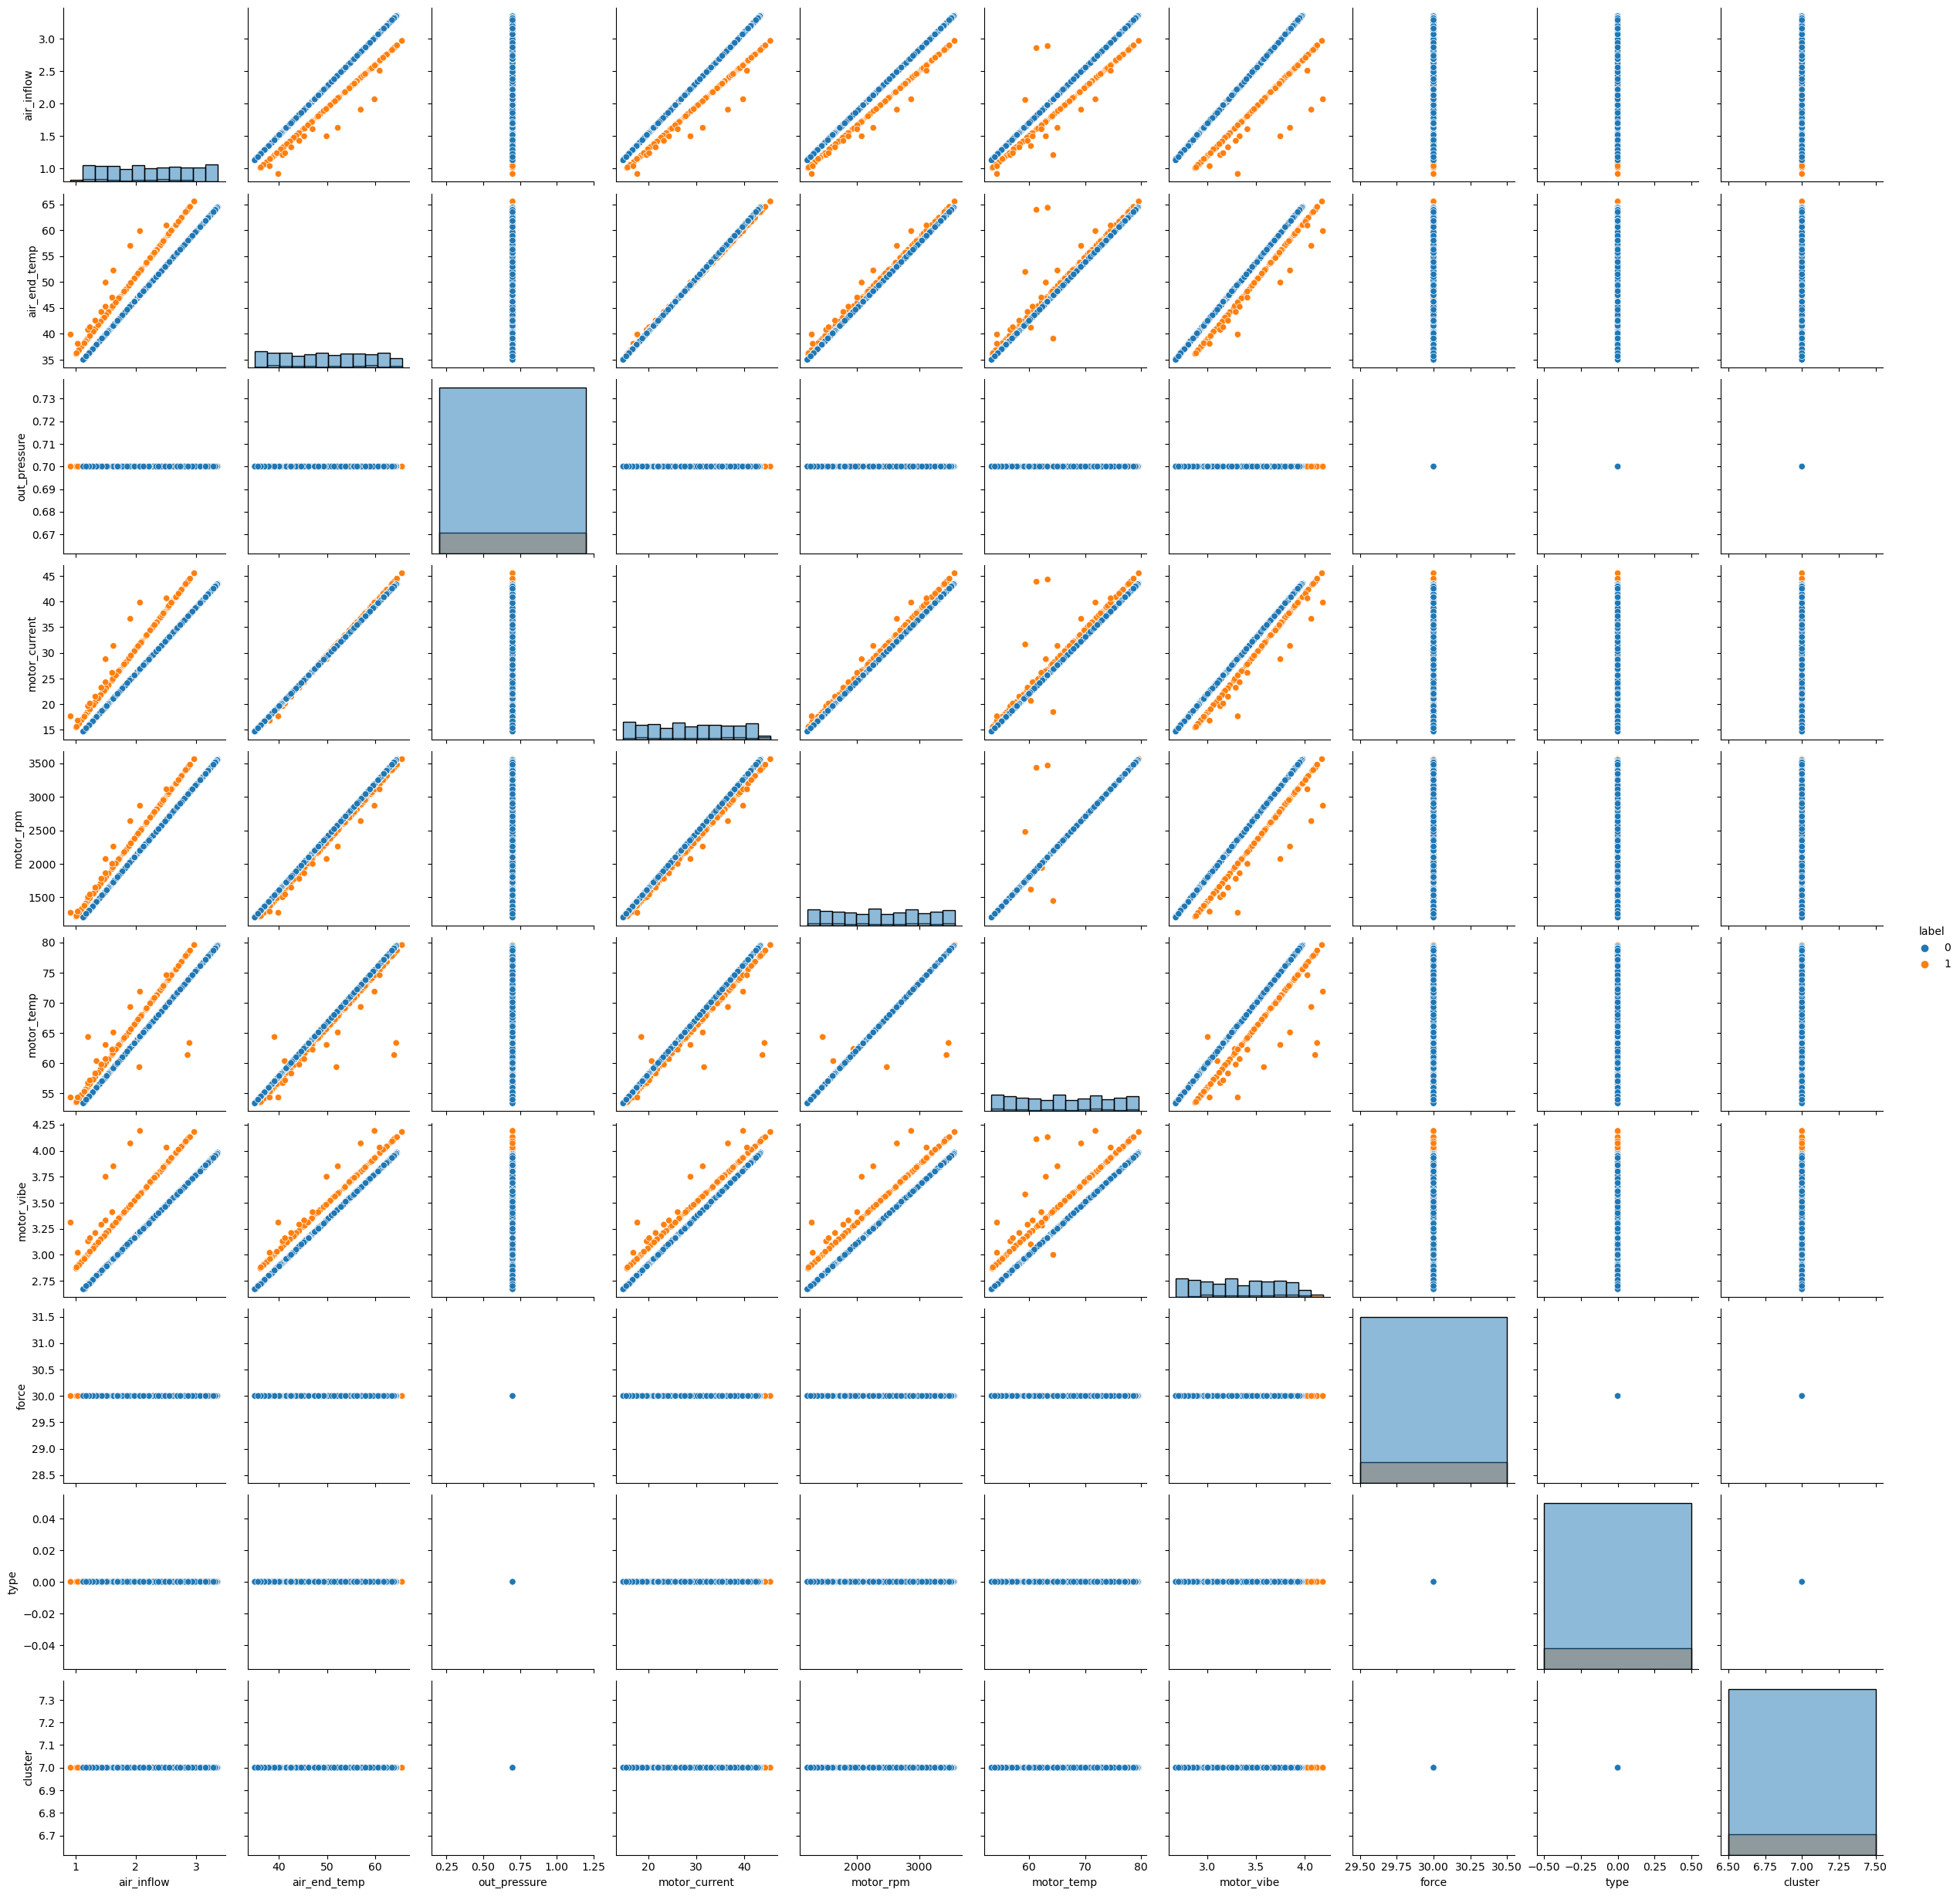

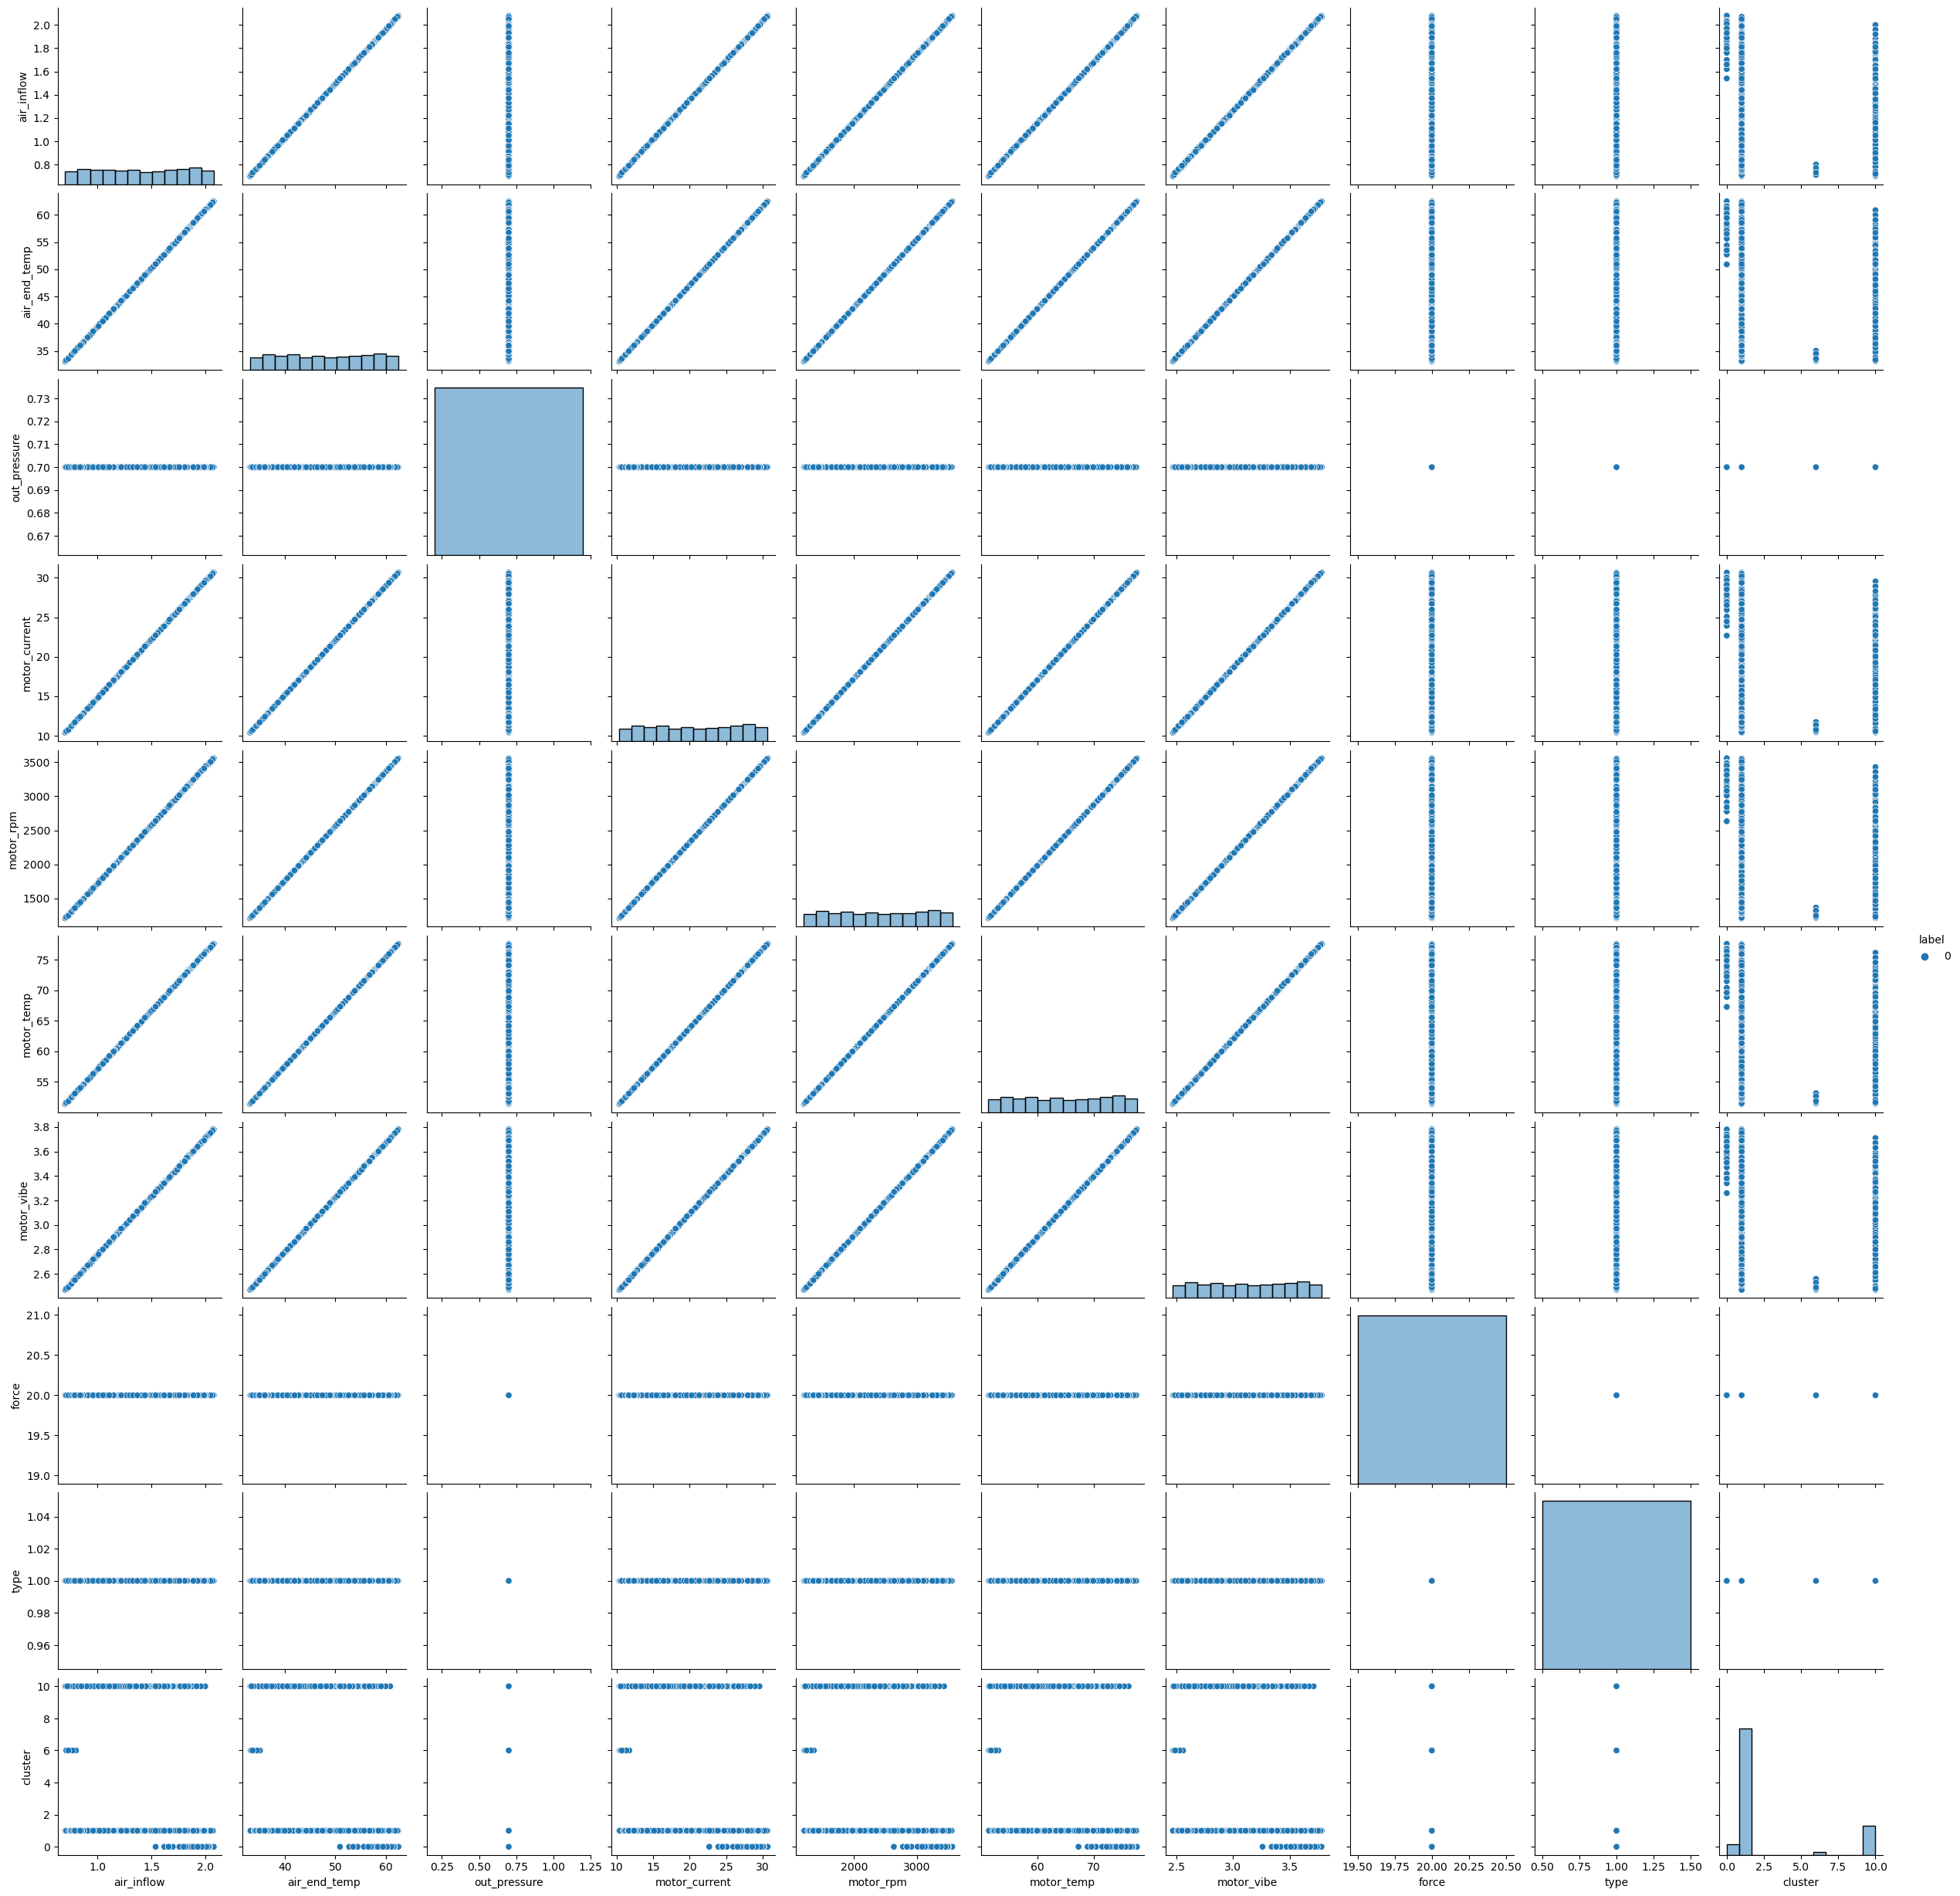

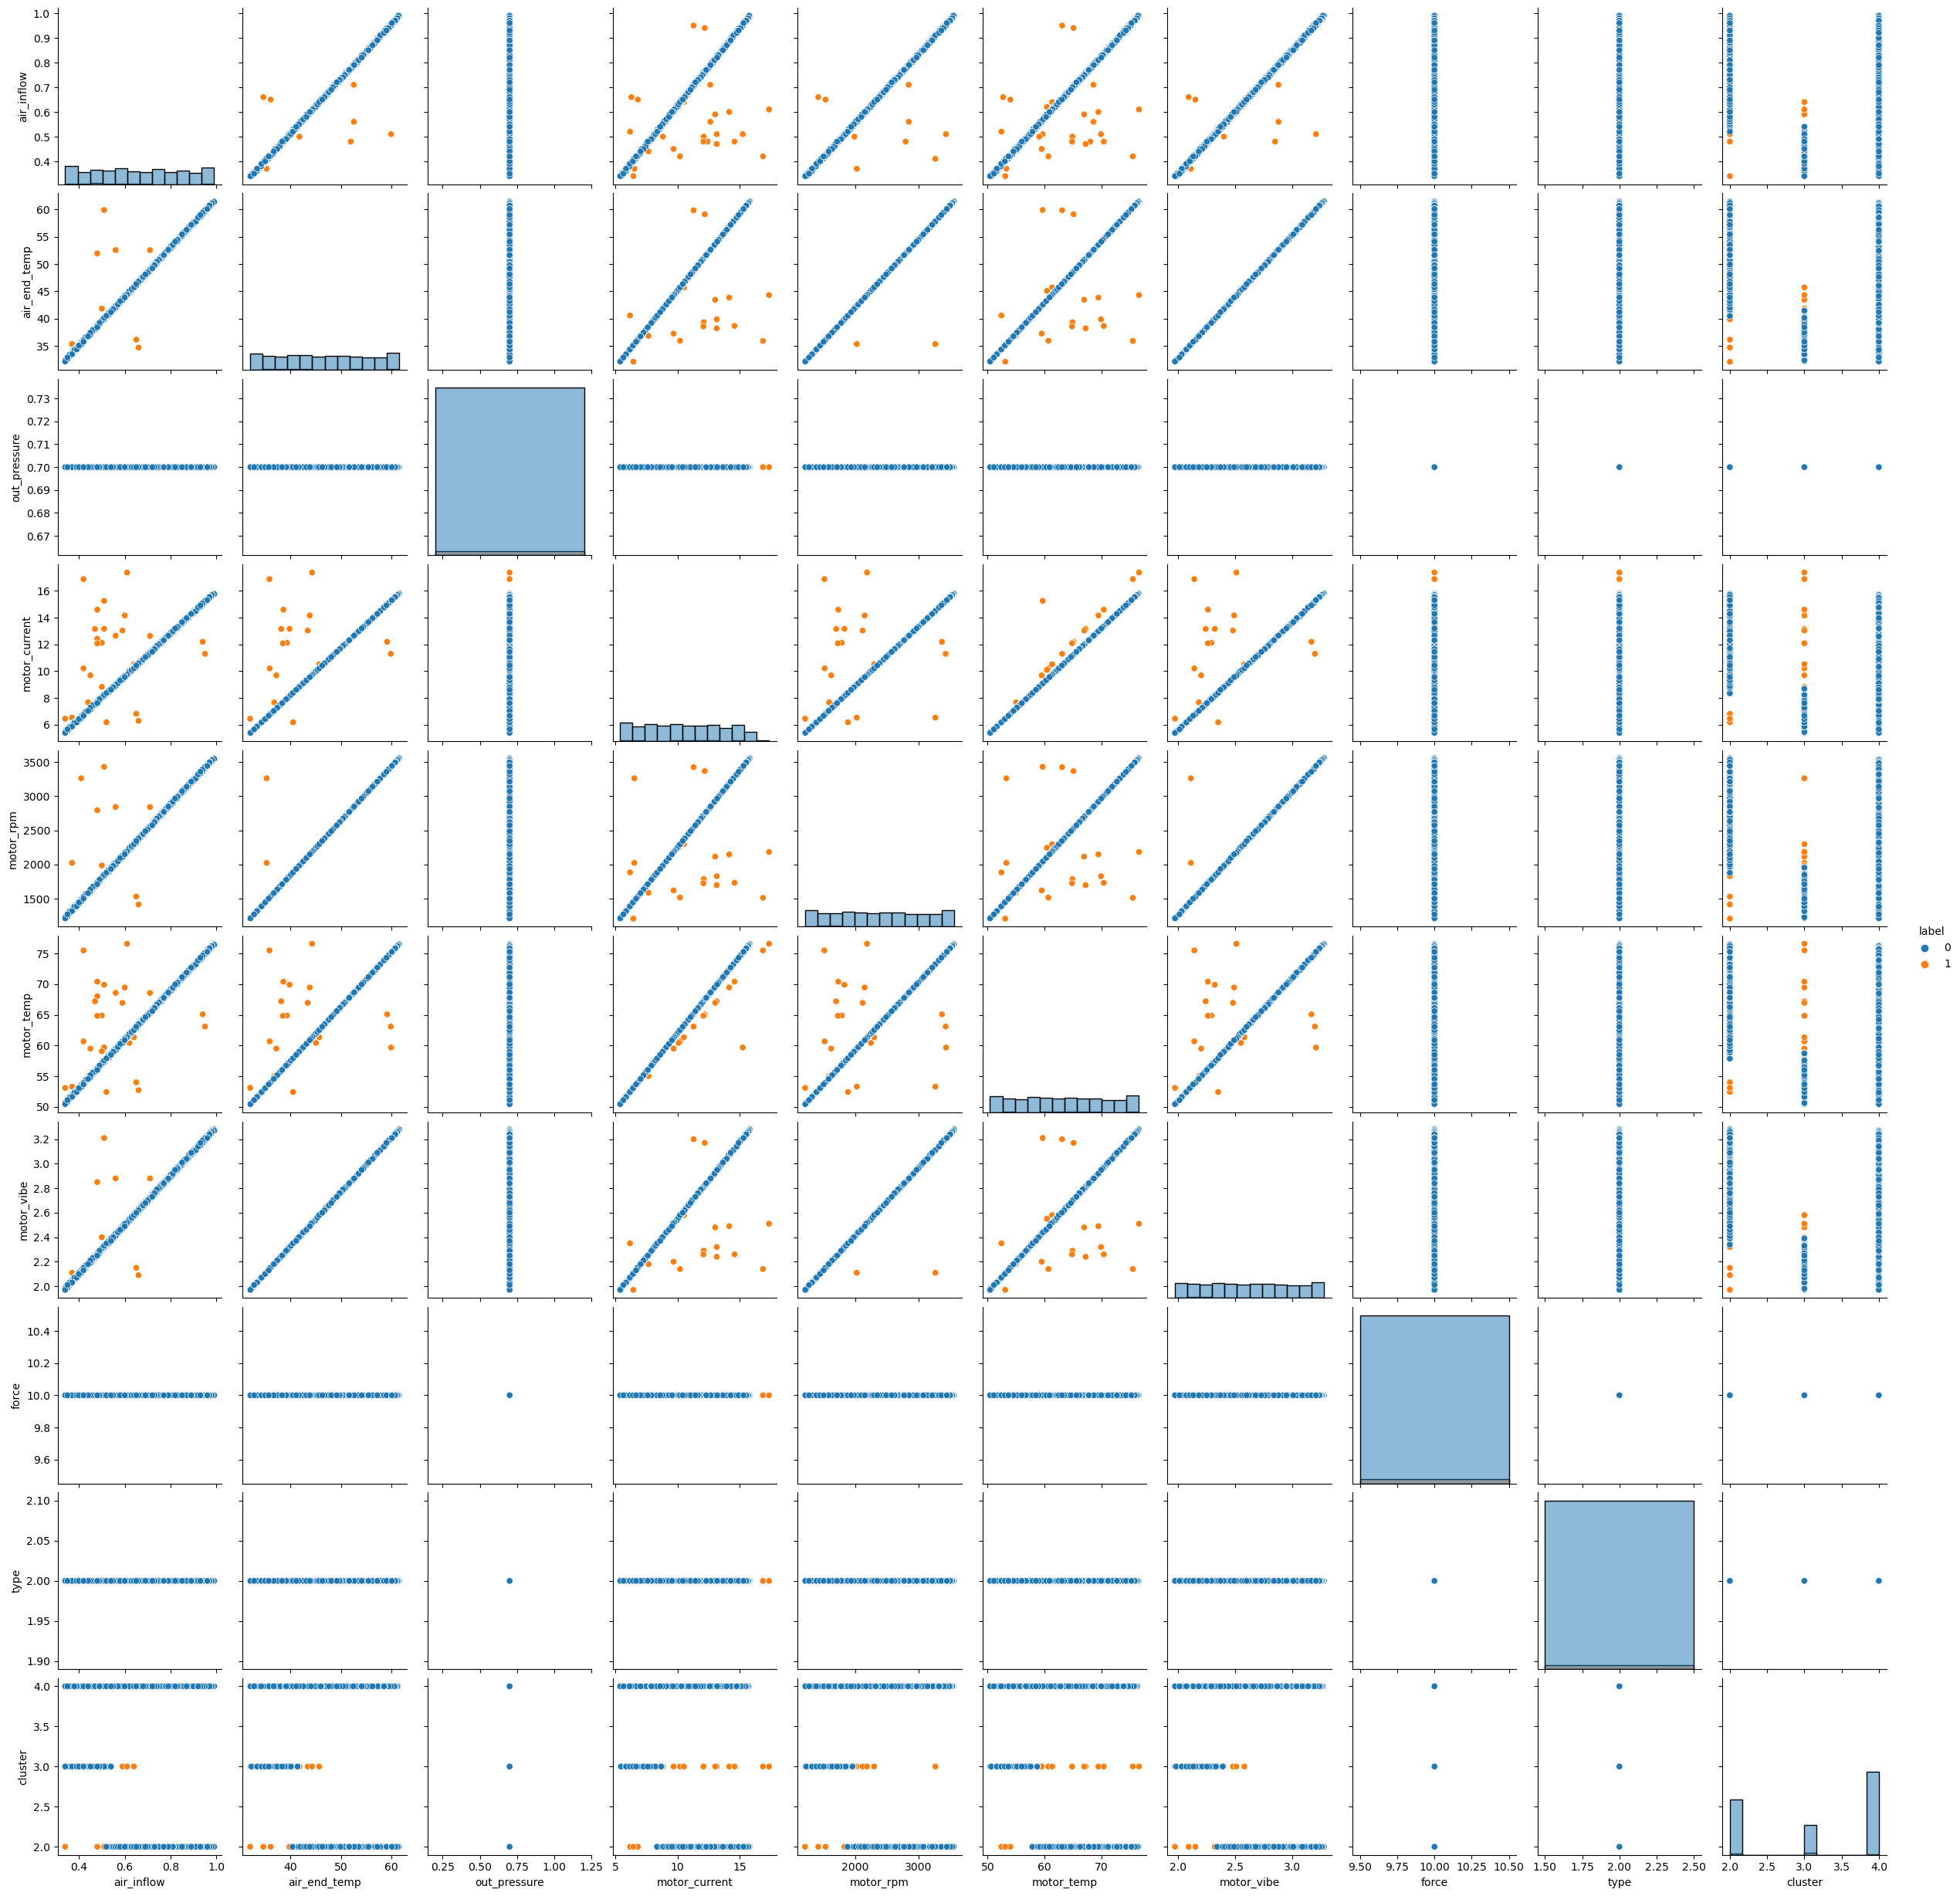

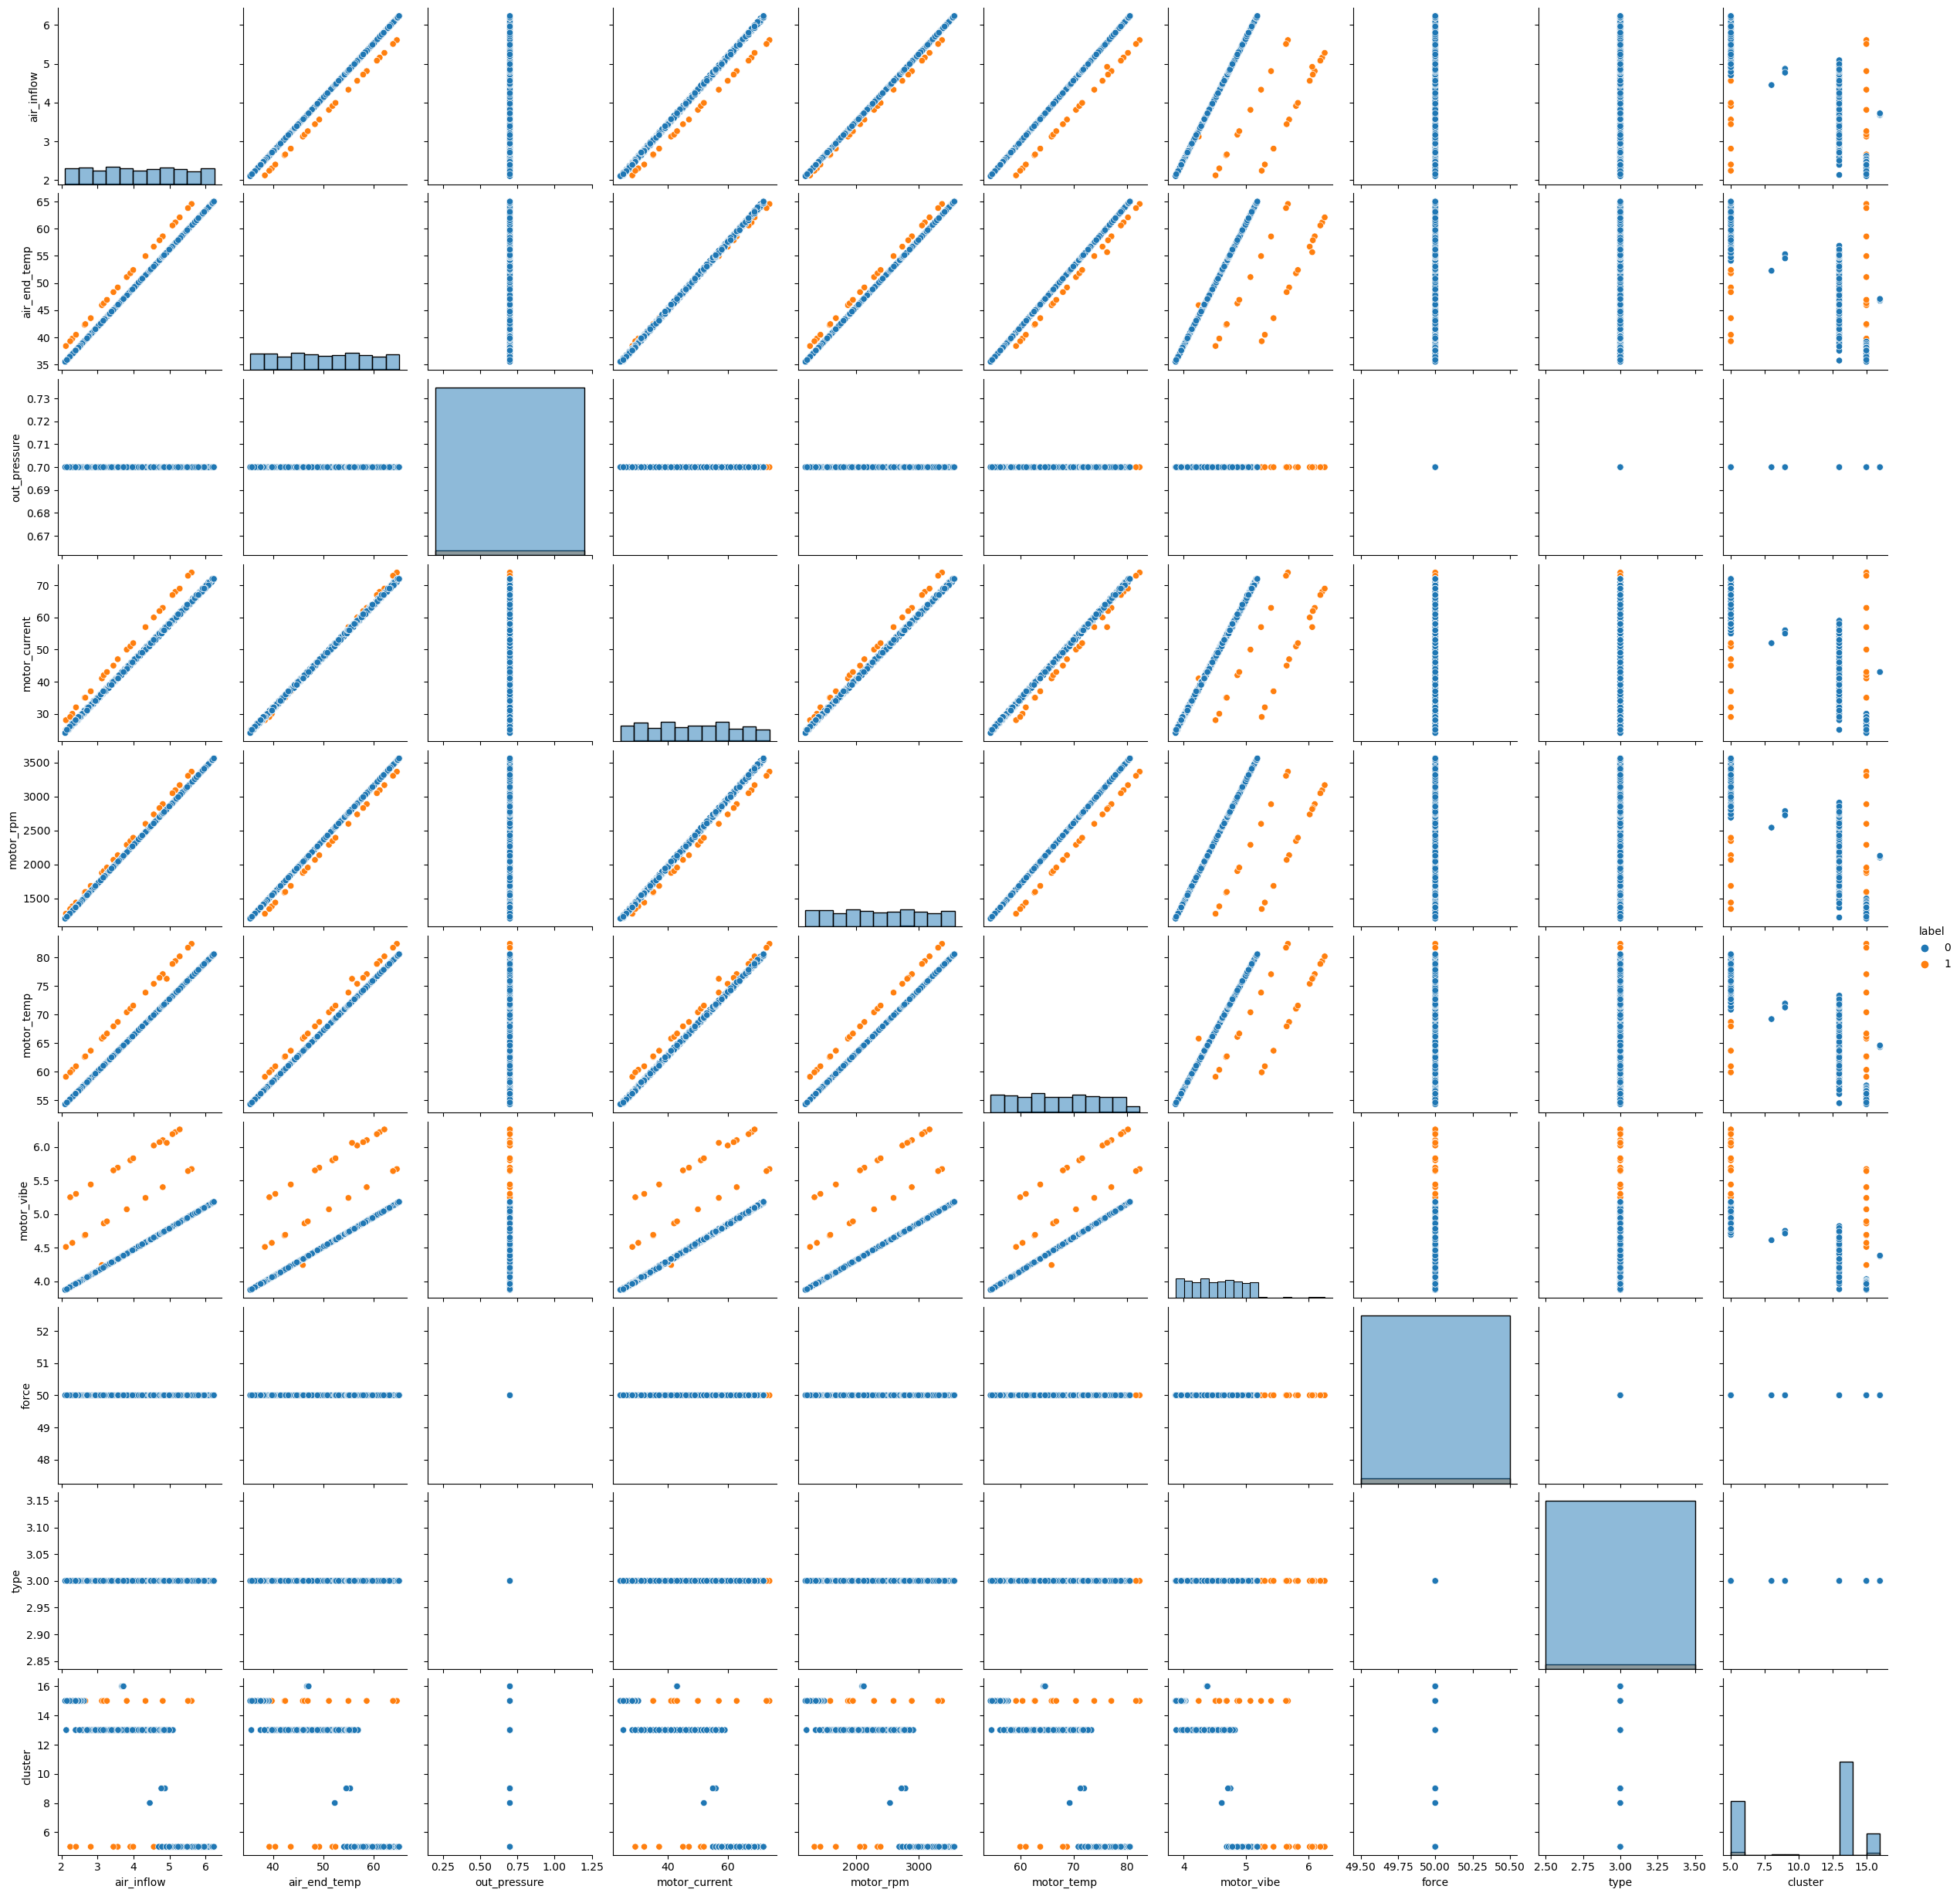

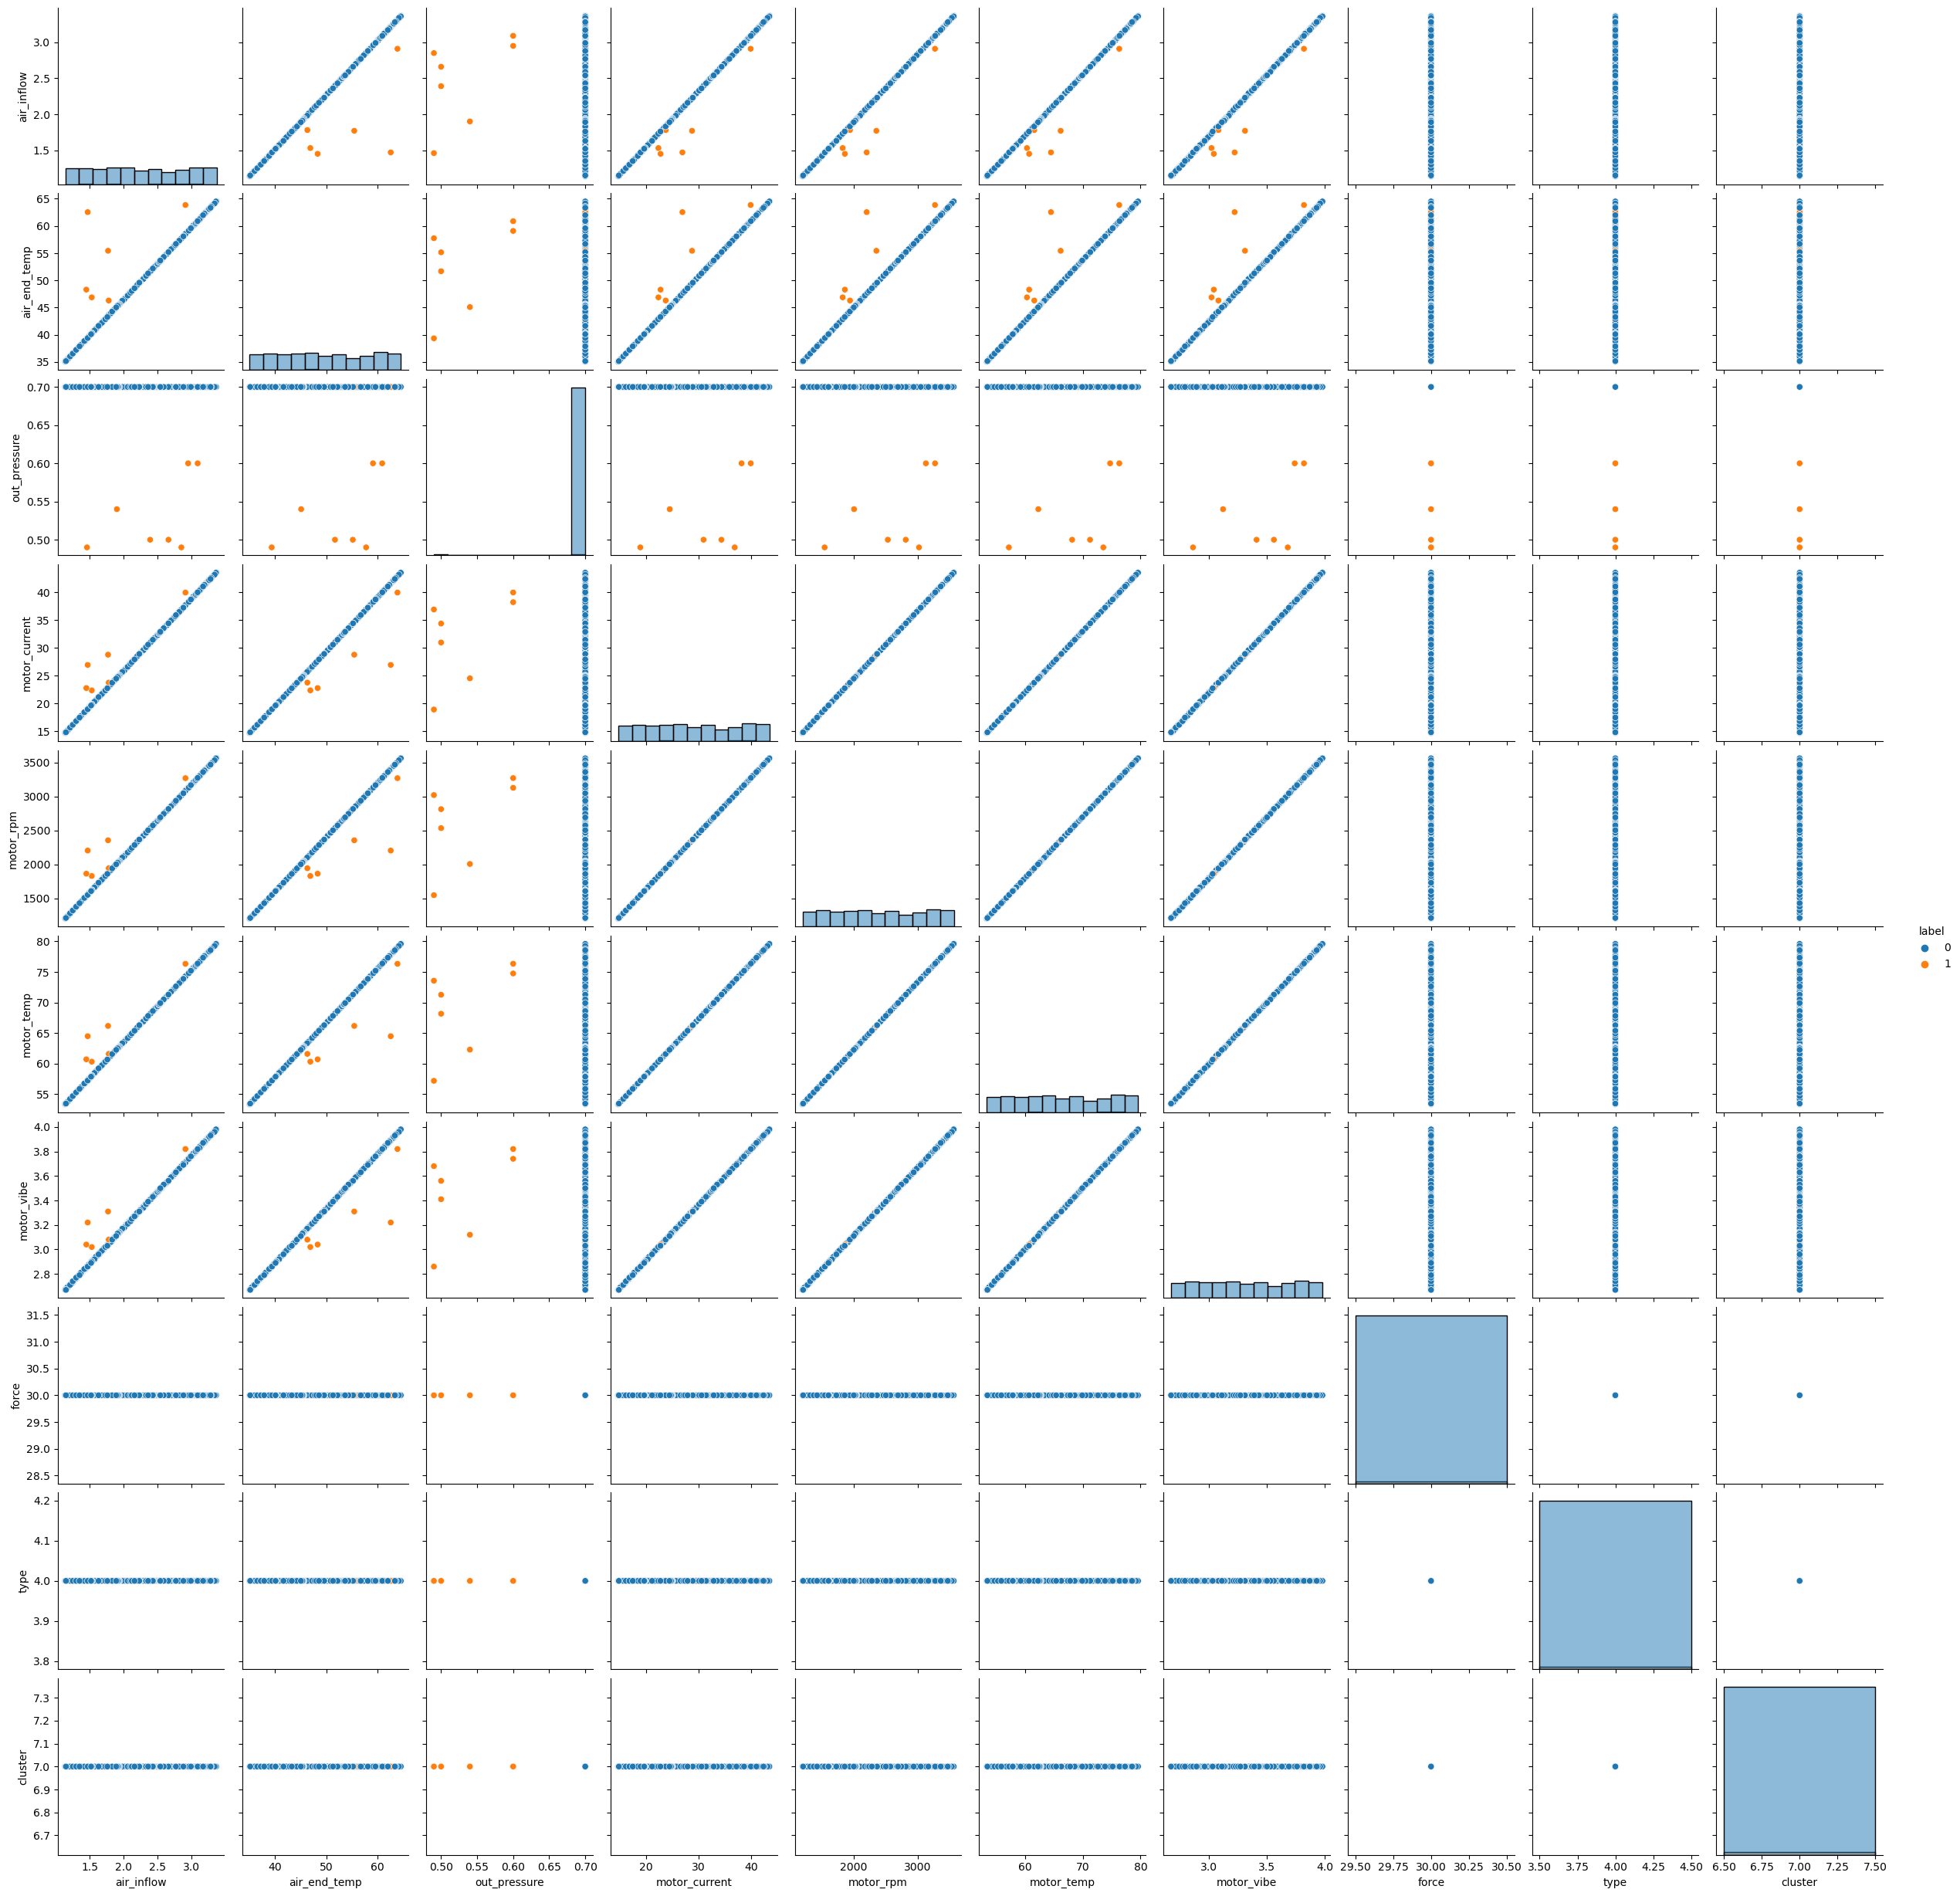

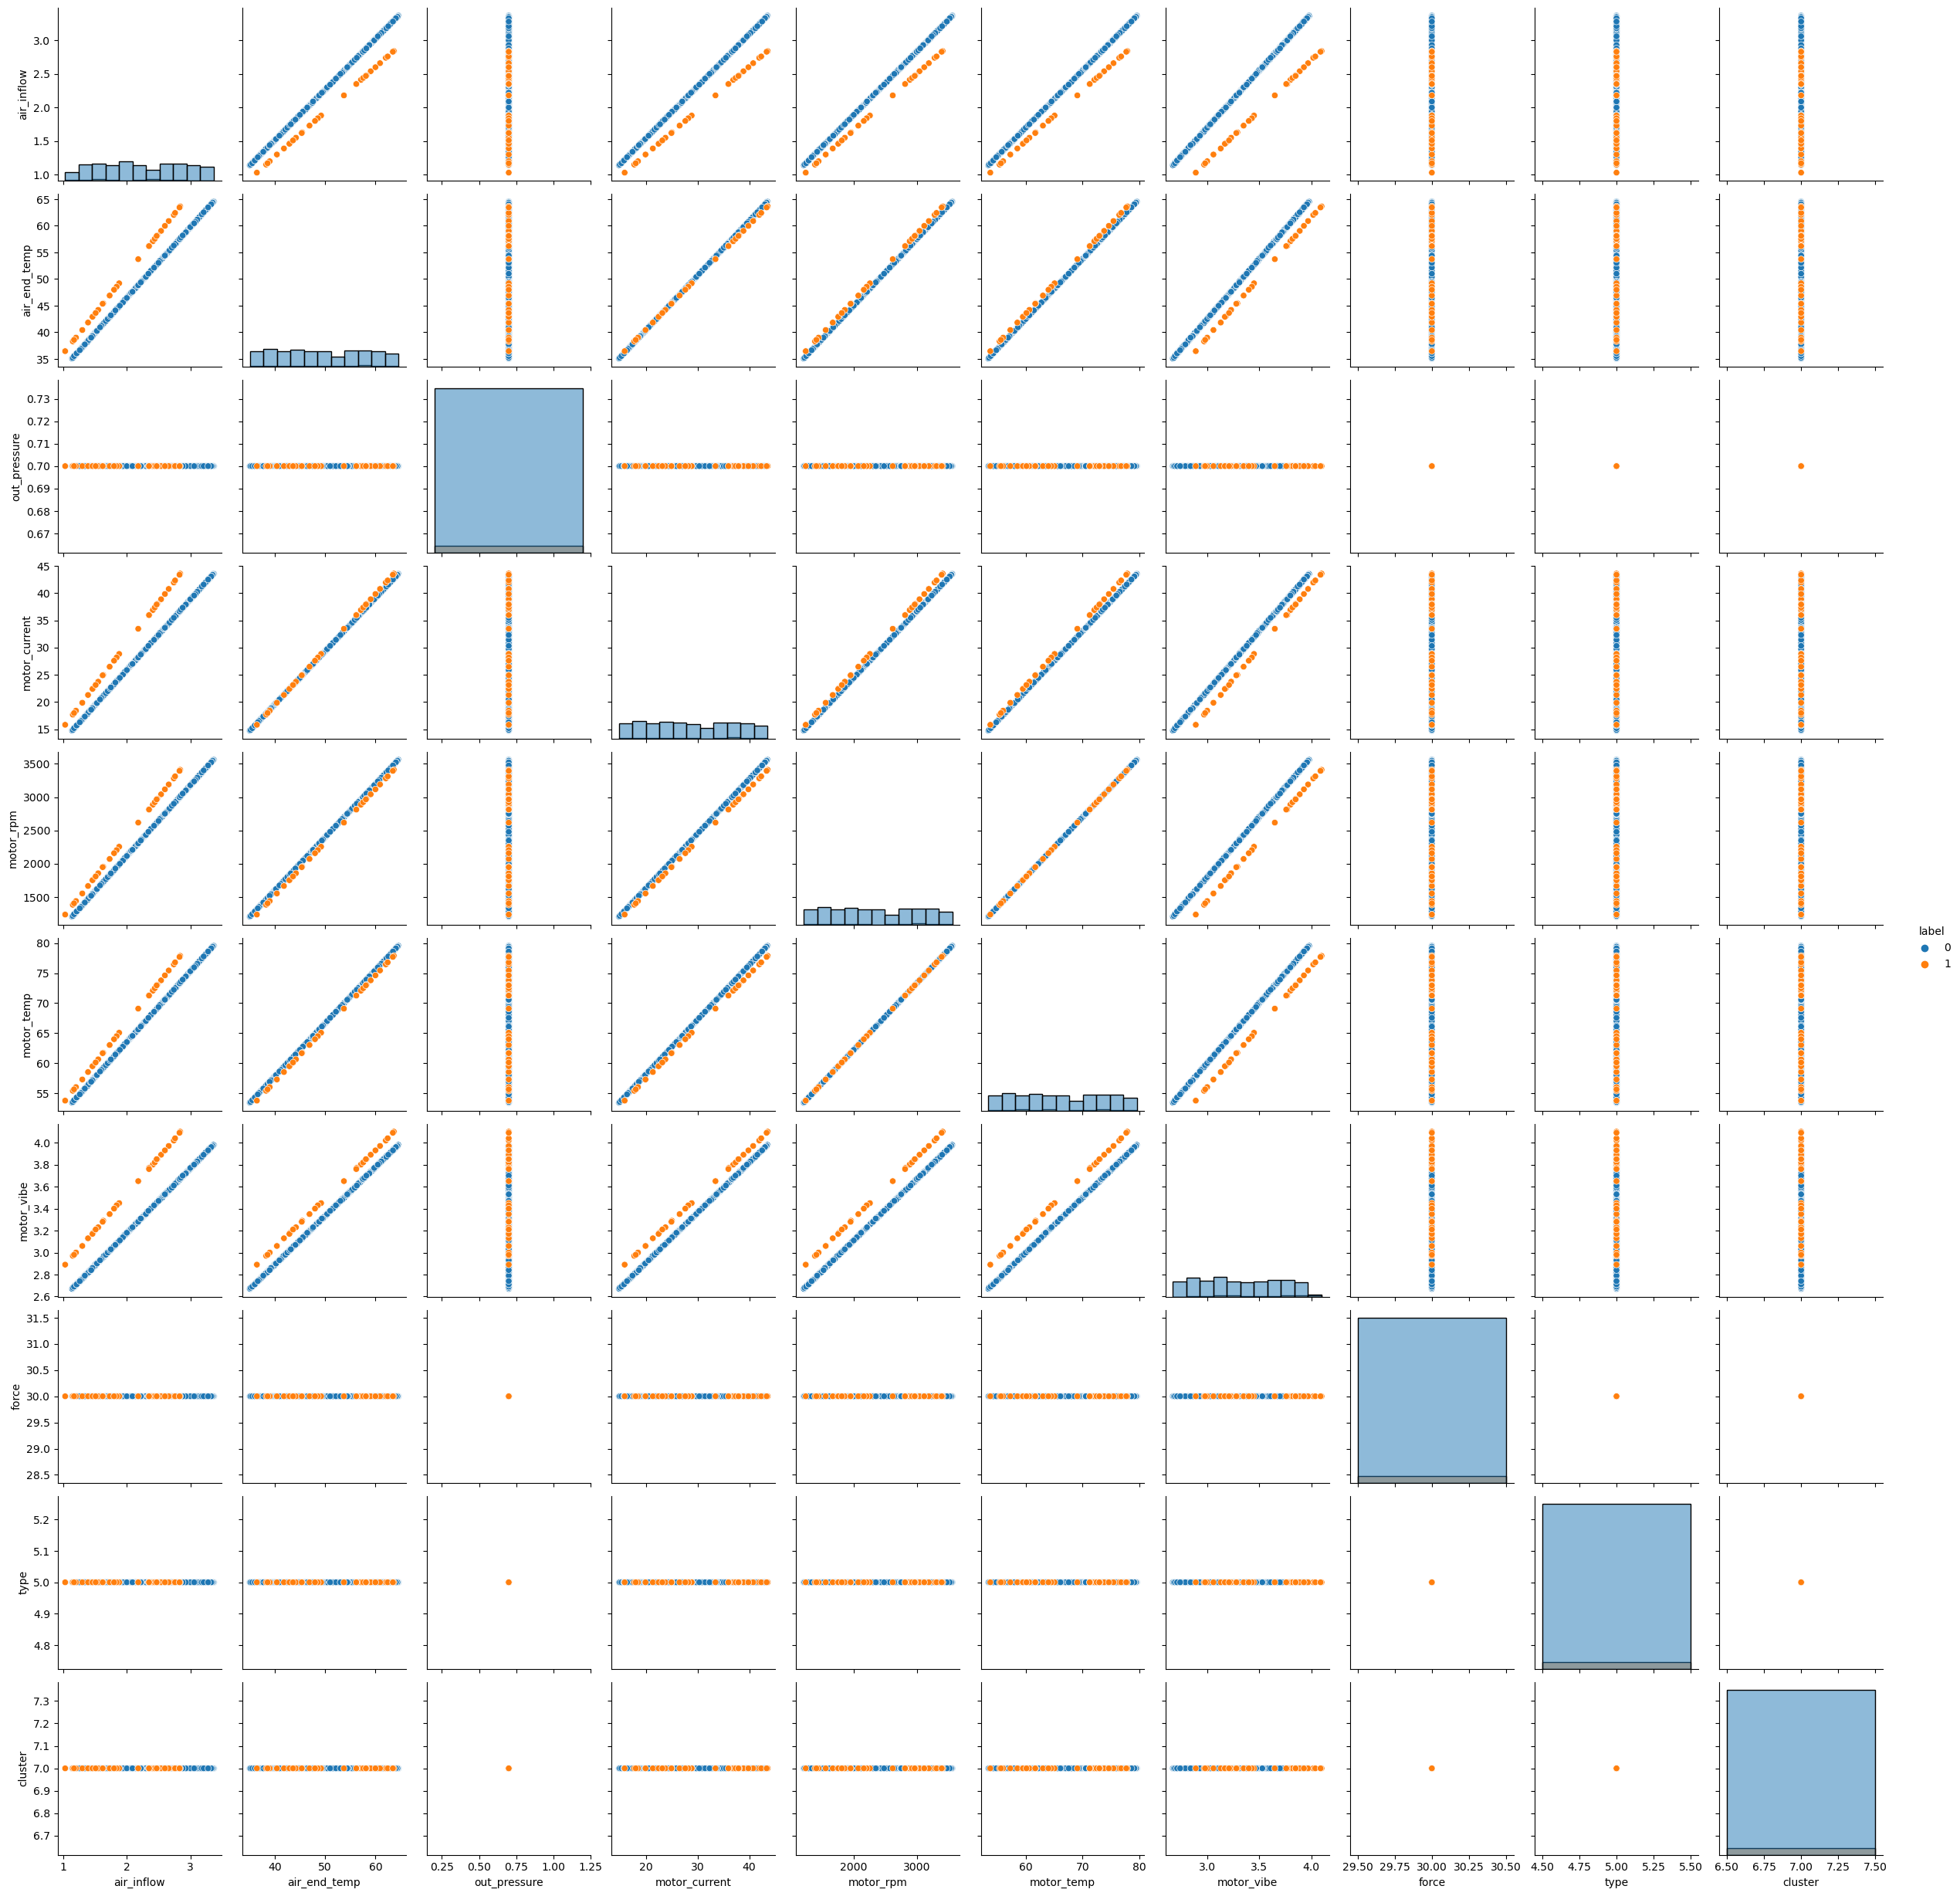

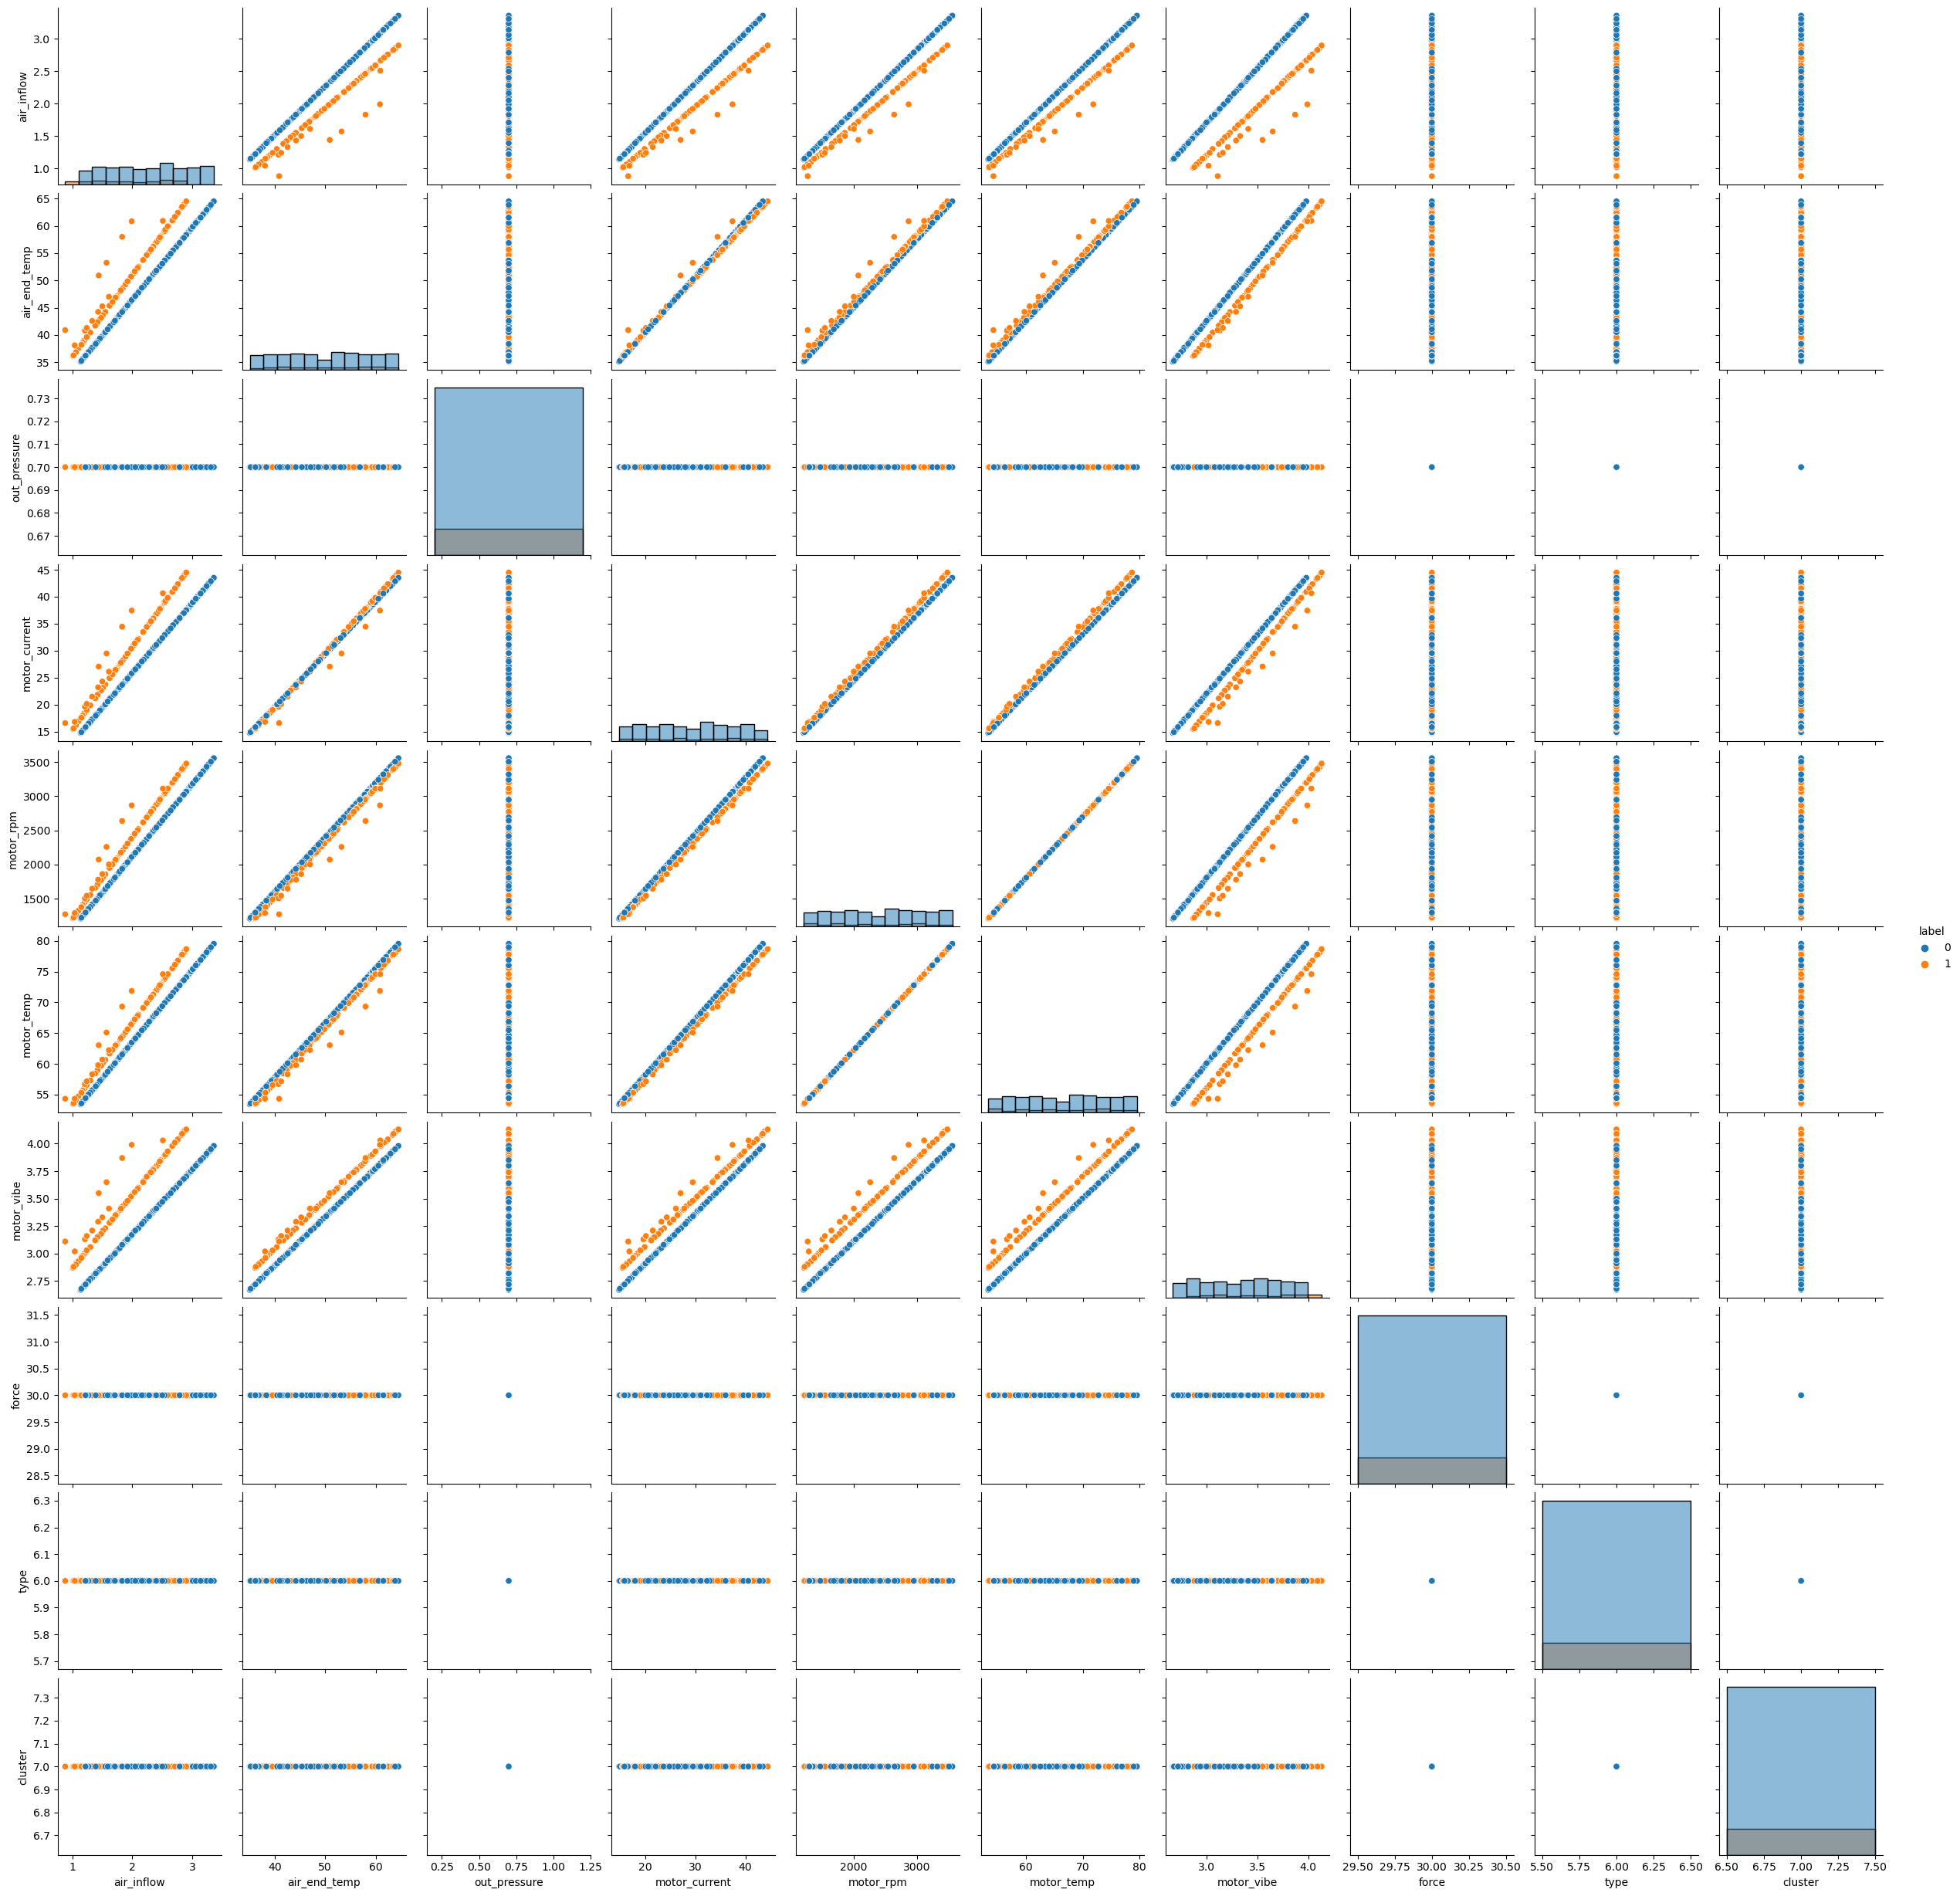

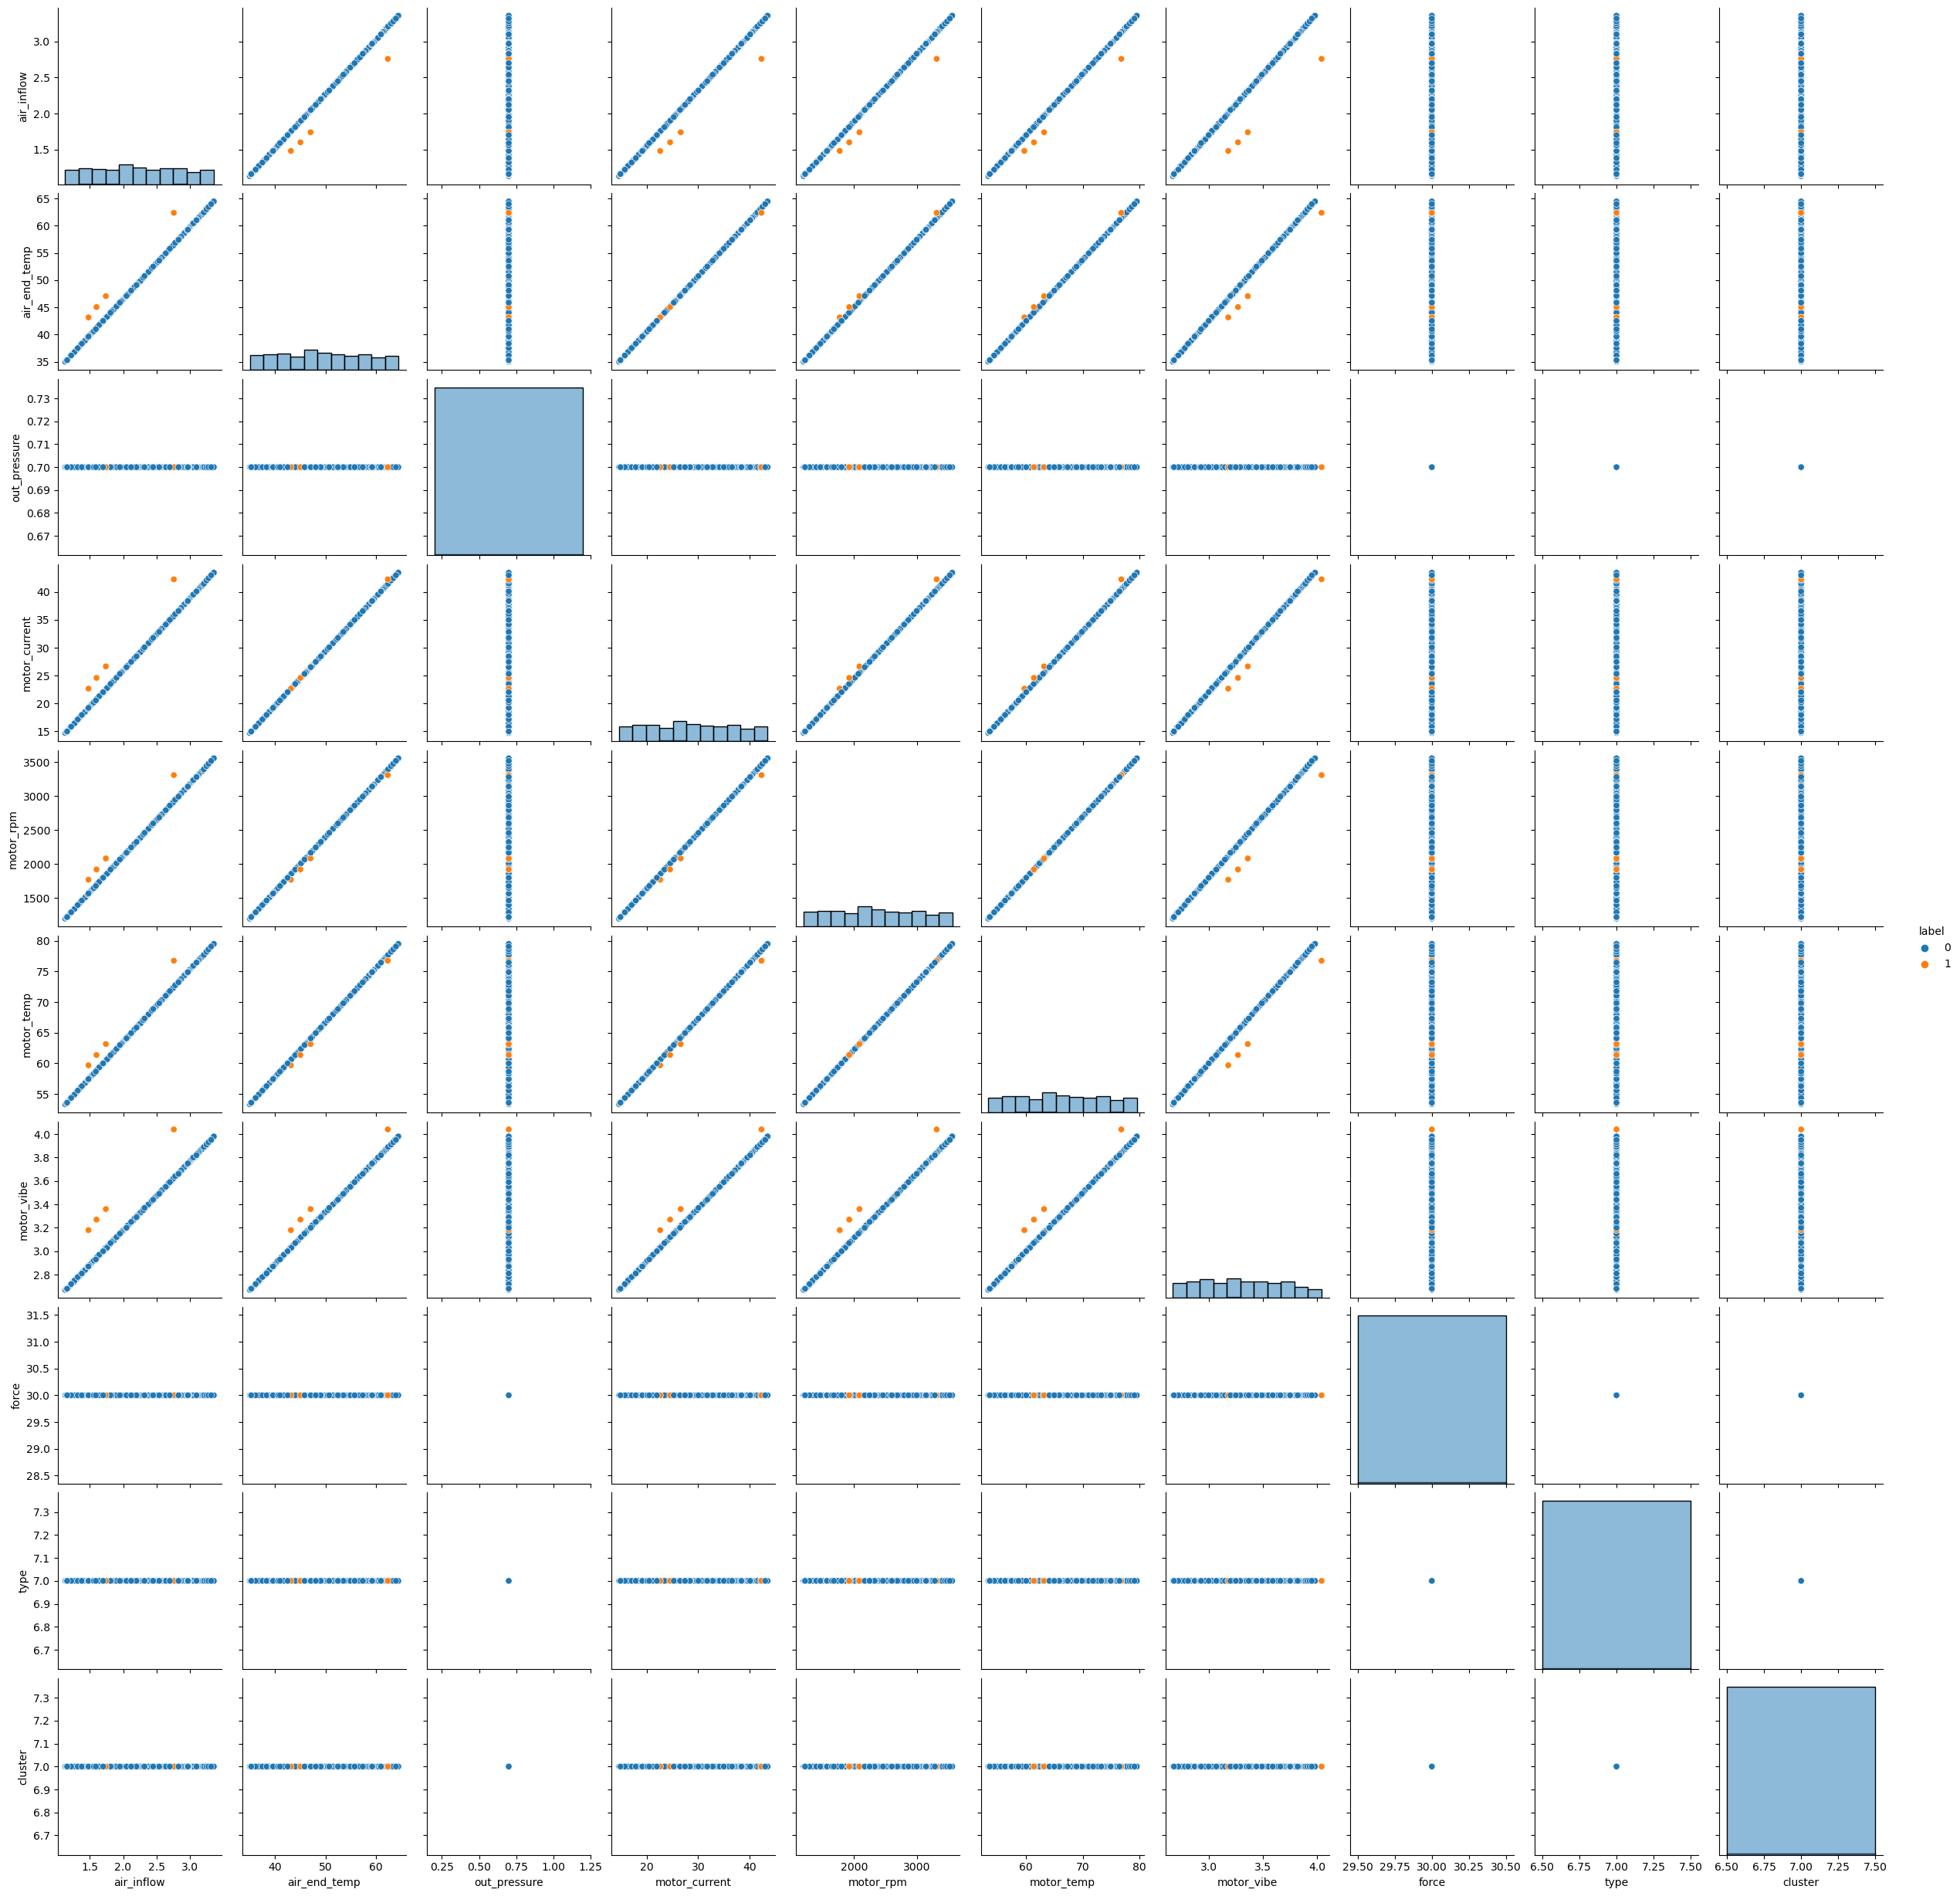

In [27]:
import seaborn as sns
for i in df['type'].unique():
	sns.pairplot(df.loc[df['type'] == i],diag_kind='hist',hue='label')

In [ ]:
df_final = df[['type', 'label']]

In [ ]:
df_final.to_csv('gmm.csv', index=False)